In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
h = 0.001     # time step
R_0 = -2.0    # initial value of R
J_0 = 3.0     # initial value of J
n = 1000      # number of data points

## Data import

In [4]:
data = pd.read_csv("/content/drive/MyDrive/exact.csv")
data.columns = ["Step", "R", "J"]
data.head()

,Step,R,J
0,0,"-1,678969244","3,635587444"
1,1,"-1,331199653","1,092044203"
2,2,"-3,262655098","2,6063602"
3,3,"0,7475997113","2,653502669"
4,4,"-2,595587134","2,486162931"


In [5]:
data.dtypes

Step     int64
R       object
J       object
dtype: object

In [6]:
# convert R and J to float
data["R"] = data["R"].str.replace(',', '.').astype('float')
data["J"] = data["J"].str.replace(',', '.').astype('float')

In [7]:
# adjust the step
data["Step"] += 1

In [8]:
data.head(10)

,Step,R,J
0,1,-1.678969,3.635587
1,2,-1.331200,1.092044
2,3,-3.262655,2.606360
3,4,0.747600,2.653503
4,5,-2.595587,2.486163
5,6,-2.206740,2.309700
6,7,-1.319781,4.438445
7,8,-1.789069,3.480226
8,9,-4.806522,1.821735
9,10,-1.434671,2.193432


## Data visualization

Text(0, 0.5, 'Love')

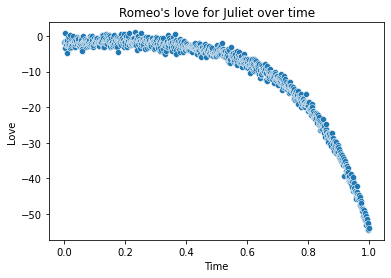

In [9]:
# Plotting Romeo's love
sns.scatterplot(x = data["Step"] * 0.001, y = data["R"])
plt.title("Romeo's love for Juliet over time")
plt.xlabel("Time")
plt.ylabel("Love")

Text(0, 0.5, 'Love')

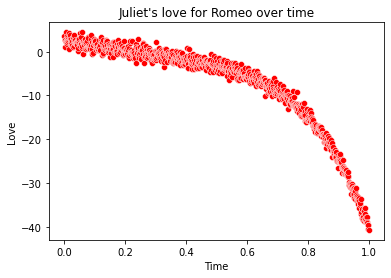

In [10]:
# Plotting Juliet's love
sns.scatterplot(x = data["Step"] * 0.001, y = data["J"], color = "red")
plt.title("Juliet's love for Romeo over time")
plt.xlabel("Time")
plt.ylabel("Love")

## Model building

In [67]:
# Convert to true values to tensor
true_values = tf.convert_to_tensor(data[["R", "J"]], dtype=float)

In [68]:
# Variable definition
## [[a, b],
##  [c, d]]
coefs = tf.Variable(tf.random.normal([2, 2]))
coefs

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.5308573 ,  0.695275  ],
       [-1.3508402 , -0.32814068]], dtype=float32)>

In [69]:
# Hyperparameters
learning_rate = 0.01
iterations = 500

In [70]:
# Euler method
eye = tf.constant([[1, 0], [0, 1]], dtype = float)

## prev is a vector of the form [R_n-1, J_n-1]
## returns [R_n, J_n]
def eulerApproxNext(prev, coefs, h):
    return tf.reduce_sum(prev * (coefs * h + eye), 1)

In [71]:
# Training
iter_slots = tf.zeros([n])
initial_values = tf.constant([R_0, J_0])
for i in range(iterations):
    print("Iteration", i)
    with tf.GradientTape() as tape:
        approx_values = tf.scan(lambda prev, _: eulerApproxNext(prev, coefs, h), iter_slots, initializer = initial_values)
        error = tf.reduce_sum((approx_values - true_values) ** 2) / (2 * n)
    grads = tape.gradient(error, coefs)
    coefs.assign_add(-grads * learning_rate)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [73]:
coefs

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 2.877137 ,  1.1490114],
       [ 4.4226365, -1.7807196]], dtype=float32)>

## Perfomance Evaluation

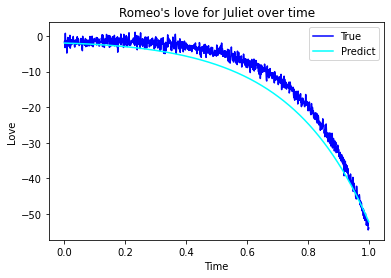

In [90]:
plt.plot(np.arange(0.001, 1.001, 0.001), data["R"], color = "blue", label = "True")
plt.plot(np.arange(0.001, 1.001, 0.001), approx_values[:, 0], color = "cyan", label = "Predict")
plt.title("Romeo's love for Juliet over time")
plt.xlabel("Time")
plt.ylabel("Love")
plt.legend()

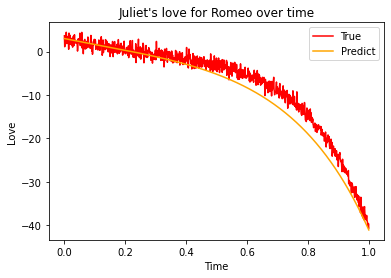

In [94]:
plt.plot(np.arange(0.001, 1.001, 0.001), data["J"], color = "red", label = "True")
plt.plot(np.arange(0.001, 1.001, 0.001), approx_values[:, 1], color = "orange", label = "Predict")
plt.title("Juliet's love for Romeo over time")
plt.xlabel("Time")
plt.ylabel("Love")
plt.legend()